<a href="https://colab.research.google.com/github/Rohanpeerla/Module-6-Project/blob/master/Module_6_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
sample_data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [10, 20, 30, 40, 50],
    'Target':   [0, 1, 0, 1, 0]
}
data = pd.DataFrame(sample_data)
print(data)

   Feature1  Feature2  Target
0         1        10       0
1         2        20       1
2         3        30       0
3         4        40       1
4         5        50       0


In [3]:
import pandas as pd
path = "https://raw.githubusercontent.com/PranavTadimeti/Regression_Project/main/covid_19_data.csv"
df_orig = pd.read_csv(path)
print("Original DataFrame:")
print(df_orig.head())
df_modified = df_orig.copy()
df_modified['Confirmed'] = df_modified['Confirmed'] * 2
print("\nModified DataFrame:")
print(df_modified.head())

Original DataFrame:
   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  

Modified DataFrame:
   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01

In [4]:
import pandas as pd
import copy
path = "https://raw.githubusercontent.com/PranavTadimeti/Regression_Project/main/covid_19_data.csv"
df_orig = pd.read_csv(path)
df = copy.deepcopy(df_orig)
df.drop('Last Update', inplace=True, axis=1)
date_lst = df['ObservationDate'].unique()
date_dict = {}
for date in date_lst:
    df_temp = df.loc[df['ObservationDate'] == date]
    date_dict[date] = df_temp
date_tot_tup_dict = {}
for date, df_date in date_dict.items():
    total_confirmed = df_date['Confirmed'].sum()
    total_deaths = df_date['Deaths'].sum()
    total_recovered = df_date['Recovered'].sum()
    date_tot_tup_dict[date] = (total_confirmed, total_deaths, total_recovered)
df_date_tots = pd.DataFrame.from_dict(date_tot_tup_dict, orient='index', columns=['Confirmed', 'Deaths', 'Recovered'])
df_date_tots.index.name = 'Date'
print(df_date_tots.head())

            Confirmed  Deaths  Recovered
Date                                    
01/22/2020      555.0    17.0       28.0
01/23/2020      653.0    18.0       30.0
01/24/2020      941.0    26.0       36.0
01/25/2020     1438.0    42.0       39.0
01/26/2020     2118.0    56.0       52.0


In [6]:
df_date_tots['Closed Cases'] = df_date_tots['Deaths'] + df_date_tots['Recovered']
print(df_date_tots.head())

            Confirmed  Deaths  Recovered  Closed Cases
Date                                                  
01/22/2020      555.0    17.0       28.0          45.0
01/23/2020      653.0    18.0       30.0          48.0
01/24/2020      941.0    26.0       36.0          62.0
01/25/2020     1438.0    42.0       39.0          81.0
01/26/2020     2118.0    56.0       52.0         108.0


In [7]:
df_date_tots['Active Cases'] = df_date_tots['Confirmed'] - df_date_tots['Closed Cases']
print(df_date_tots.head())

            Confirmed  Deaths  Recovered  Closed Cases  Active Cases
Date                                                                
01/22/2020      555.0    17.0       28.0          45.0         510.0
01/23/2020      653.0    18.0       30.0          48.0         605.0
01/24/2020      941.0    26.0       36.0          62.0         879.0
01/25/2020     1438.0    42.0       39.0          81.0        1357.0
01/26/2020     2118.0    56.0       52.0         108.0        2010.0


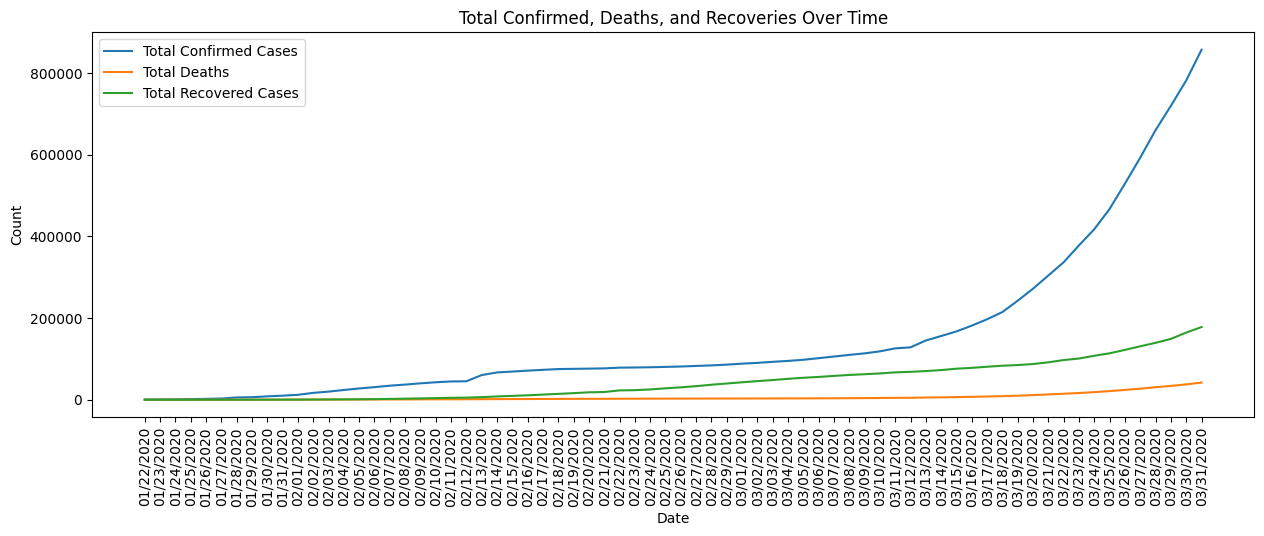

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15, 5])
plt.plot(df_date_tots.index, df_date_tots['Confirmed'], label="Total Confirmed Cases")
plt.plot(df_date_tots.index, df_date_tots['Deaths'], label="Total Deaths")
plt.plot(df_date_tots.index, df_date_tots['Recovered'], label="Total Recovered Cases")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Total Confirmed, Deaths, and Recoveries Over Time")
plt.xticks(rotation=90)
plt.show()


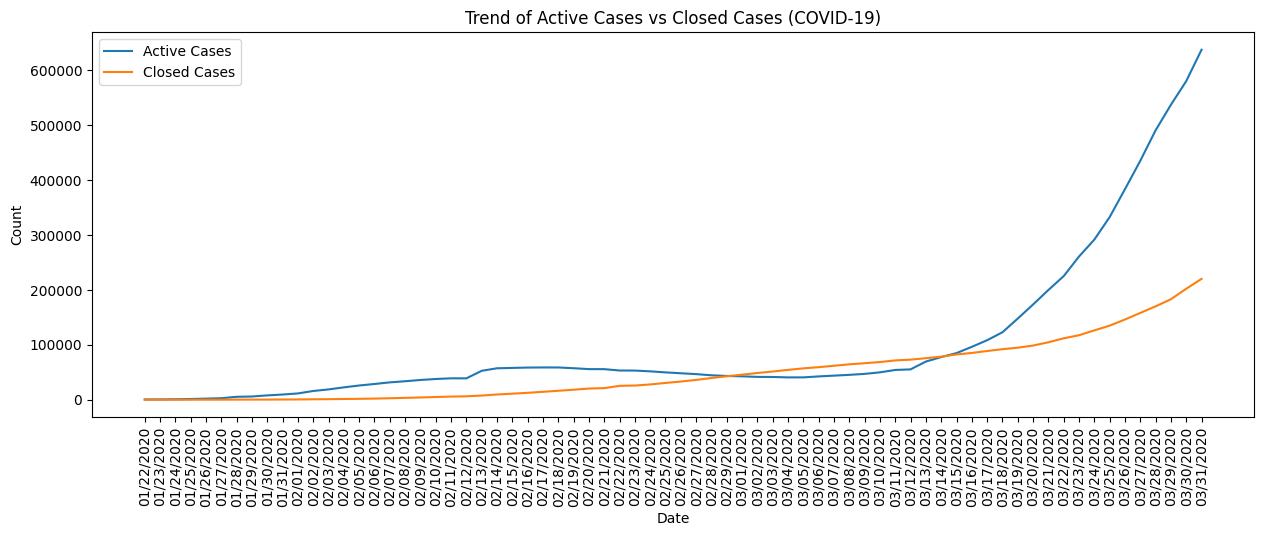

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15, 5])
plt.plot(df_date_tots.index, df_date_tots['Active Cases'], label="Active Cases")
plt.plot(df_date_tots.index, df_date_tots['Closed Cases'], label="Closed Cases")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("Trend of Active Cases vs Closed Cases (COVID-19)")
plt.xticks(rotation=90)
plt.show()


In [16]:
growth_len_lst = len(date_lst) - 1
confirmed_lst = df_date_tots["Confirmed"]
death_lst = df_date_tots["Deaths"]
recovered_lst = df_date_tots["Recovered"]
confGF_lst = []
deathsGF_lst = []
recovGF_lst = []
for i in range(growth_len_lst):
    confirmedGF = confirmed_lst[i+1] / confirmed_lst[i]
    confGF_lst.append(confirmedGF)
    deathGF = death_lst[i+1] / death_lst[i]
    deathsGF_lst.append(deathGF)
    recoveredGF = recovered_lst[i+1] / recovered_lst[i]
    recovGF_lst.append(recoveredGF)


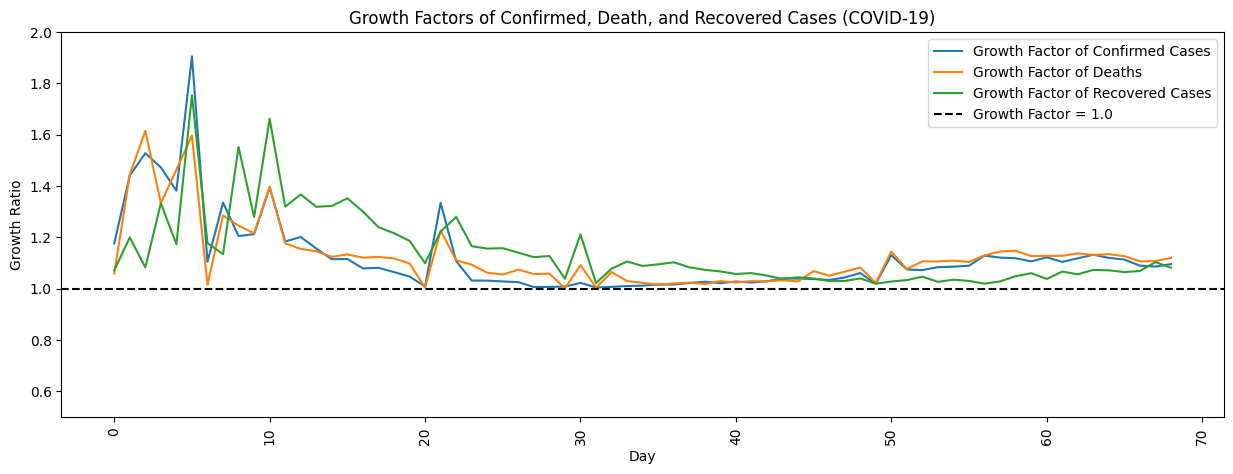

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15, 5])
plt.plot(confGF_lst, label="Growth Factor of Confirmed Cases")
plt.plot(deathsGF_lst, label="Growth Factor of Deaths")
plt.plot(recovGF_lst, label="Growth Factor of Recovered Cases")
plt.axhline(y=1.0, color='black', linestyle='--', label="Growth Factor = 1.0")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Growth Ratio")
plt.title("Growth Factors of Confirmed, Death, and Recovered Cases (COVID-19)")
plt.ylim(0.5, 2)
plt.xticks(rotation=90)
plt.show()

Part 2-Prediction using linear regression

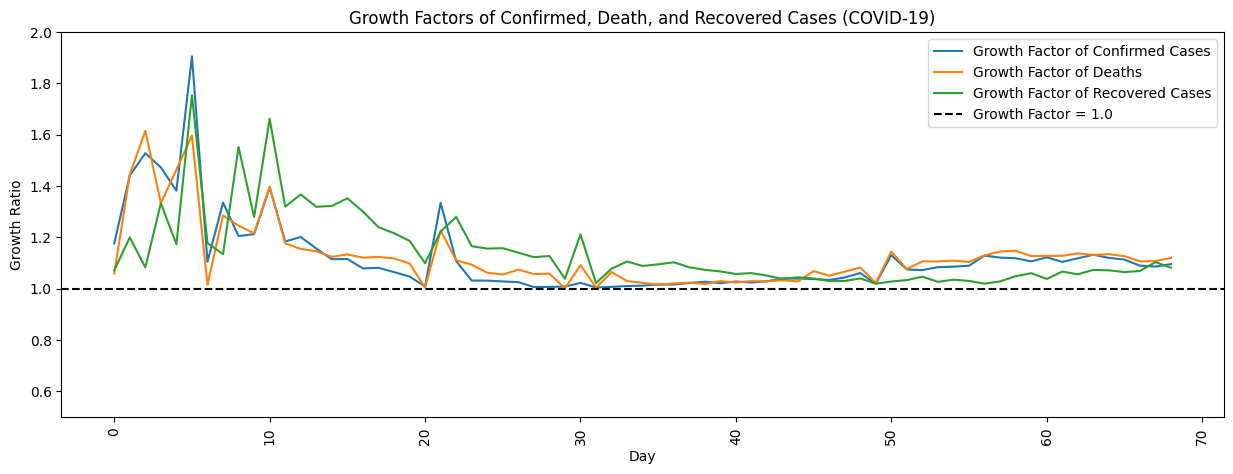

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=[15, 5])
plt.plot(confGF_lst, label="Growth Factor of Confirmed Cases")
plt.plot(deathsGF_lst, label="Growth Factor of Deaths")
plt.plot(recovGF_lst, label="Growth Factor of Recovered Cases")
plt.axhline(y=1.0, color='black', linestyle='--', label="Growth Factor = 1.0")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Growth Ratio")
plt.title("Growth Factors of Confirmed, Death, and Recovered Cases (COVID-19)")
plt.ylim(0.5, 2)
plt.xticks(rotation=90)
plt.show()

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert 'ObservationDate' column to datetime format if needed
df_date_tots['ObservationDate'] = pd.to_datetime(df_date_tots['ObservationDate'])

# Calculate the number of days since the initial date
df_date_tots['Days Since'] = (df_date_tots['ObservationDate'] - df_date_tots['ObservationDate'].min()).dt.days

# Extract features (X) and target variable (y)
X = np.array(df_date_tots["Days Since"]).reshape(-1, 1)  # Reshape to maintain compatibility with sklearn
y = np.array(df_date_tots["Confirmed"])

# Define the train-test split
train_size = int(0.85 * len(X))  # 85% of the data for training

# Split the data into train and test sets
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Display the shapes of train and test sets
print("Train set shapes - X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("Test set shapes - X_test: {}, y_test: {}".format(X_test.shape, y_test.shape))

# Further split the data into train and test sets without shuffling
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.15,
                                                    shuffle=False)

# Display the shapes of train and test sets after the second split
print("\nTrain set shapes (after split) - X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("Test set shapes (after split) - X_test: {}, y_test: {}".format(X_test.shape, y_test.shape))


KeyError: 'ObservationDate'

In [36]:
plt.figure(figsize = [15,5])
# plotting the actual values for the future days
plt.plot(X_test,
         y_test,
         label = "Actual Confirmed Cases")
# plotting the predicited values for the future days
plt.plot(X_test,
         test_lin_pred,
         label = "Lin Regression predicted Confirmed Cases")
plt.grid();
plt.legend();
plt.xlabel("Day", size = 25)
plt.ylabel("Count", size = 25)
plt.xticks(rotation = 90, size = 15)
plt.show()

print('MAE:', mean_absolute_error (test_lin_pred, X_test))
print('MSE:', mean_squared_error  (test_lin_pred, X_test))

NameError: name 'X_test' is not defined

<Figure size 1500x500 with 0 Axes>

ValueError: could not convert string to float: '01/22/2020'

In [48]:
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
path = "https://raw.githubusercontent.com/PranavTadimeti/Regression_Project/main/covid_19_data.csv"
df_orig = pd.read_csv(path)
df_orig['ObservationDate'] = pd.to_datetime(df_orig['ObservationDate'])
df_orig['Days Since'] = df_orig['ObservationDate'].apply(lambda x: x.toordinal())
X = df_orig[['Days Since']].values
y = df_orig['Confirmed'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
tol = [0.001, 0.01, 0.1]
alpha_1 = [1e-6, 1e-5, 1e-4]
alpha_2 = [1e-6, 1e-5, 1e-4]
lambda_1 = [1e-6, 1e-5, 1e-4]
lambda_2 = [1e-6, 1e-5, 1e-4]

bayesian_grid = {
    'tol': tol,
    'alpha_1': alpha_1,
    'alpha_2': alpha_2,
    'lambda_1': lambda_1,
    'lambda_2': lambda_2
}
bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(
    bayesian,
    bayesian_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    return_train_score=True,
    n_jobs=-1,
    n_iter=40,
    verbose=1
)
bayesian_search.fit(X_train, y_train)
print(bayesian_search.best_params_)
y_pred = bayesian_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)


Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'tol': 0.01, 'lambda_2': 1e-06, 'lambda_1': 0.0001, 'alpha_2': 0.0001, 'alpha_1': 0.0001}
Mean Squared Error on Test Set: 34416468.51972211


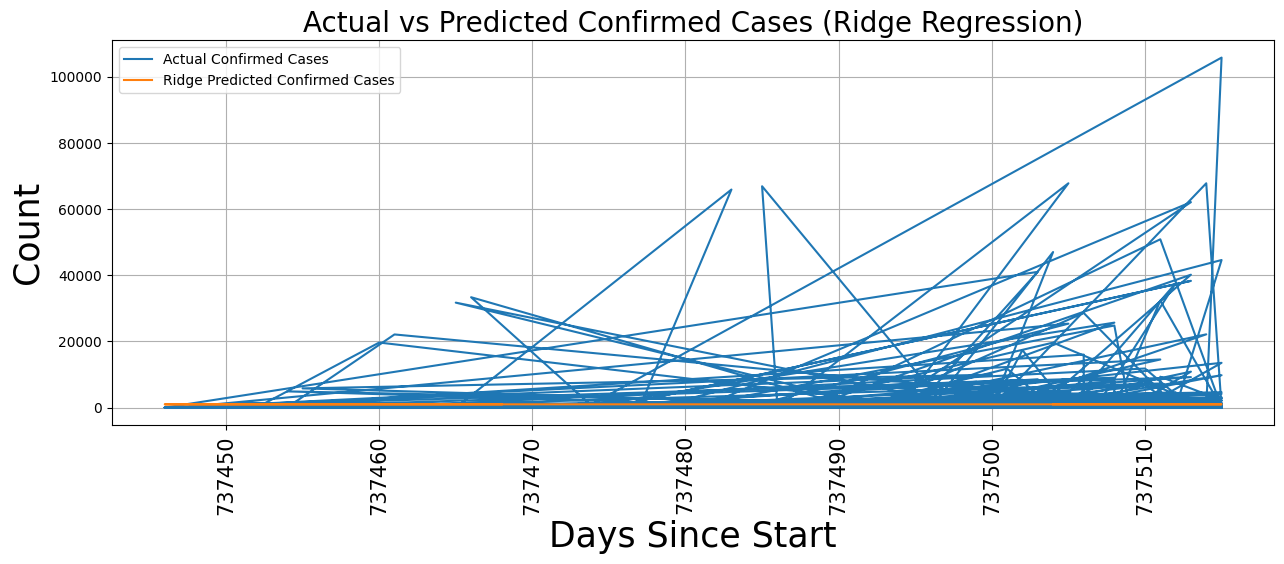

MAE: 1597.7604091598446
MSE: 34416468.51972211


In [50]:
import matplotlib.pyplot as plt
y_test_ridge_pred = bayesian_search.predict(X_test)
plt.figure(figsize=[15, 5])
plt.plot(X_test, y_test, label="Actual Confirmed Cases")
plt.plot(X_test, y_test_ridge_pred, label="Ridge Predicted Confirmed Cases")
plt.grid()
plt.legend()
plt.xlabel("Days Since Start", size=25)
plt.ylabel("Count", size=25)
plt.xticks(rotation=90, size=15)
plt.title("Actual vs Predicted Confirmed Cases (Ridge Regression)", size=20)
plt.show()
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_ridge = mean_absolute_error(y_test_ridge_pred, y_test)
mse_ridge = mean_squared_error(y_test_ridge_pred, y_test)

print('MAE:', mae_ridge)
print('MSE:', mse_ridge)


NameError: name 'y_ridge_pred' is not defined

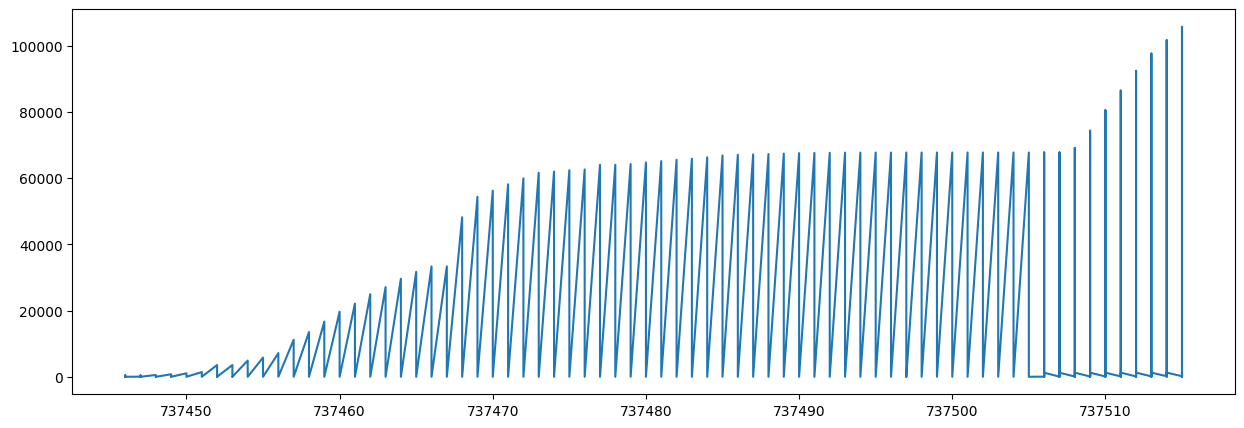

In [52]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label='Actual Future Cases')
plt.plot(X,
         y_ridge_pred,
         label='Ridge Prediction of Future Cases',
         linestyle="dashed")
plt.plot(X_train,
         y_train,
         label='Training Cases')

plt.xlabel('Days Since Start', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend()
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.title('Number of Coronavirus Cases Over Time', size=25)
plt.show()


In [53]:
bayesian_search_poly = RandomizedSearchCV(bayesian,
                                          bayesian_grid,
                                          scoring='neg_mean_squared_error',
                                          cv=5,  # Change cross-validation folds if needed
                                          return_train_score=True,
                                          n_jobs=-1,
                                          n_iter=50,  # Adjust the number of iterations as needed
                                          verbose=1)


In [55]:
bayesian_poly_confirmed = bayesian_search_poly.best_estimator_
test_poly_bayesian_pred = bayesian_poly_confirmed.predict(poly_X_test)
bayesian_poly_pred = bayesian_poly_confirmed.predict(poly_X)


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

NameError: name 'test_poly_bayesian_pred' is not defined

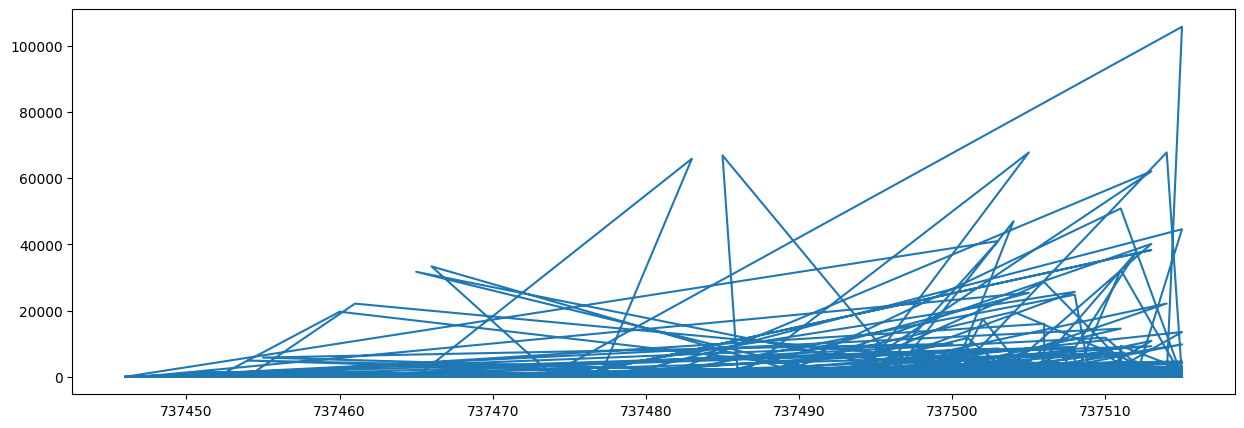

In [56]:
plt.figure(figsize=[15, 5])
plt.plot(X_test,
         y_test,
         label="Actual Confirmed Cases")
plt.plot(X_test,
         test_poly_bayesian_pred,
         label="Ridge Polynomial Predicted Confirmed Cases")

plt.grid()
plt.legend()
plt.xlabel("Days Since Start", size=25)
plt.ylabel("Count", size=25)
plt.xticks(rotation=90, size=15)
plt.title("Actual vs Predicted Confirmed Cases (Ridge Polynomial Regression)", size=20)
plt.show()

print('MAE:', mean_absolute_error(test_poly_bayesian_pred, y_test))
print('MSE:', mean_squared_error(test_poly_bayesian_pred, y_test))


NameError: name 'bayesian_poly_pred' is not defined

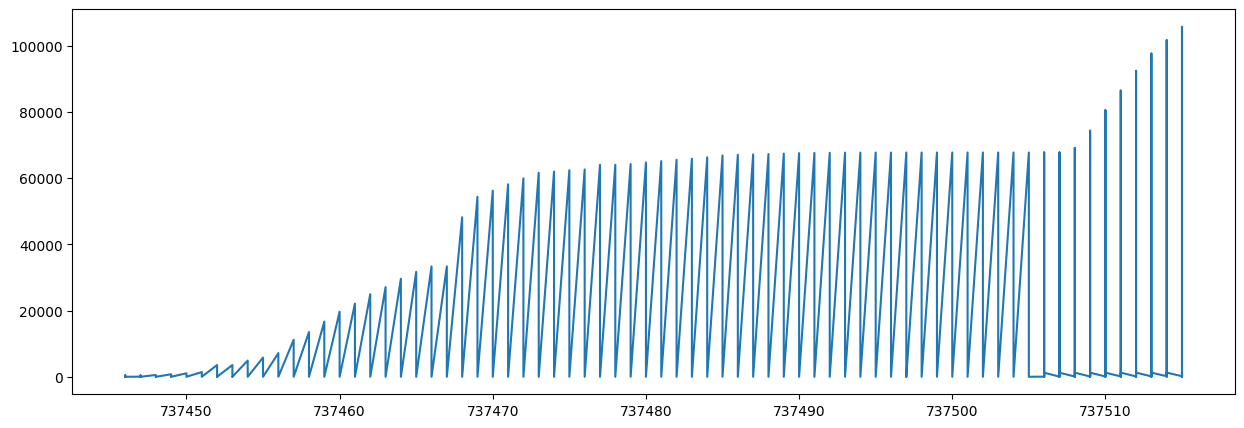

In [57]:
plt.figure(figsize=(15, 5))
plt.plot(X,
         y,
         label='Actual Future Cases')
plt.plot(X,
         bayesian_poly_pred,
         label='Ridge Polynomial Prediction of Future Cases',
         linestyle="dashed")
plt.plot(X_train,
         y_train,
         label='Training Cases')

plt.xlabel('Days Since Start', size=20)
plt.ylabel('Number of Cases', size=20)
plt.legend()
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.title('Number of Coronavirus Cases Over Time', size=25)
plt.show()


In [58]:
print("Polynomial Regression ")
print('\tMAE:', mean_absolute_error(test_poly_pred, y_test))
print('\tMSE:', mean_squared_error(test_poly_pred, y_test))

print("\nRidge Polynomial Regression ")
print('\tMAE:', mean_absolute_error(test_poly_bayesian_pred, y_test))
print('\tMSE:', mean_squared_error(test_poly_bayesian_pred, y_test))


Polynomial Regression 


NameError: name 'test_poly_pred' is not defined